## Unidad 1: Tarea práctica

<h5> Aprender distintyos modelos de clasificación capaz de clasificar nuevos datos del SDSS en tres clases: estrella, galaxia o quasar</h5>

### Dataset

El dataset Sloan Digital Sky Survey DR14 (https://www.sdss.org/dr14/) contiene 10.000
observaciones del espacio tomadas por el SDSS (https://www.sdss.org/). Cada observación es
descrita por 17 columnas de características y una columna de clase que la identifica como una
estrella, galaxia o quasar. Los datos del SDSS están descritas por características obtenidos por varias
mediciones de espectros ópticos y infrarrojos.

### Importante

- Cuidarán el preprocesamiento inicial de los datos brutos para eliminar cualquier
inconsistencia.
- Analizarán la distribución de las características para evaluar eventuales desequilibros en el
dataset.
- Entrenarán y evaluarán el rendimiento de al menos tres modelos distintos para resolver esta
tarea, utilizando métricas de evaluación apropiadas.
- Compararan el rendimiento de los modelos obtenidos y conversarán las ventajas y
desventajas potenciales de cada modelo.
- Analizarán los modelos obtenidos para identificar cuáles son las características más
relevantes para la clasificación de estrellas, galaxia y quasar.

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


In [3]:
sdss = pd.read_csv("SDSS-DR14.csv")
sdss.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


#### ¿Faltan datos en el dataset?

In [4]:
sdss.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

Se puede facilmente comprobar que para cada columna de este dataset no faltan datos

In [5]:
sdss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


Notamos que casi las columnas son de tipos numericos, menos la columna class la cual es la objetivo

#### Equilibrio del dataset

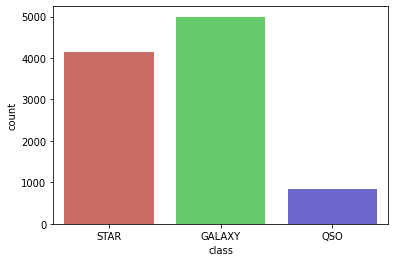

In [6]:
sb.countplot(x='class',data=sdss, palette='hls')

La conclución que se puede hacer mirando el gráfico anterior, el que nos nuestra la distribucion total de cada tipo de clase en el dataset es que no esta equiibrado. Es facil darse cuenta que los quasar tienen aproximadamente unos 1000 mediciones, lo que representa casi un 10% del total. Por otro lado, tanto las galaxias como las extrella tienen aproximadamente un 50% y 40% de los datos respectivamente. Esto estos porcentaje nos dicen que en los diferentes modelos de clasificacion que utilizaremos mas adelante, las predicciones de los quasar pueden verse pejudicadas

In [7]:
#sdss['class'].replace({'STAR':0, 'GALAXY':1, 'QSO':2}, inplace=True)
#sb.countplot(x='class',data=sdss, palette='hls')

In [8]:
X = sdss.iloc[:, 0:18]
X.drop(['class'], axis=1, inplace=True)
y = sdss.iloc[:,13]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [10]:
y_test

3555       QSO
4078    GALAXY
8445    GALAXY
5939      STAR
5583      STAR
         ...  
3341    GALAXY
4876       QSO
8343      STAR
7913    GALAXY
2190    GALAXY
Name: class, Length: 3000, dtype: object

In [11]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

# Modelo multinomial de regresión logistica

In [19]:
LogReg = LogisticRegression(multi_class='multinomial', max_iter=200)
LogReg.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
#Predicciones
y_pred = LogReg.predict(X_test_scaled)
y_pred

array(['QSO', 'GALAXY', 'GALAXY', ..., 'STAR', 'GALAXY', 'GALAXY'],
      dtype=object)

In [21]:
#confusion_matrix1 = np.array(confusion_matrix(y_test, y_pred))
#d=pd.DataFrame(confusion_matrix, index=['GALAXY','QSO', 'STAR'],columns=['predicted_GALAXY', 'predicted_QSO', 'predicted_STAR'])



In [22]:
#d=pd.DataFrame(confusion_matrix1, index=['GALAXY','QSO', 'STAR'],columns=['predicted_GALAXY', 'predicted_QSO', 'predicted_STAR'])
#d

In [24]:
LogReg.score(X_train_scaled, y_train)

0.9771428571428571

In [375]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      GALAXY       0.98      0.97      0.98      1453
         QSO       0.97      0.92      0.95       247
        STAR       0.97      0.99      0.98      1300

    accuracy                           0.98      3000
   macro avg       0.98      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



In [25]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [26]:
neigh.score(X_train_scaled, y_train)

0.9444285714285714

In [27]:
y_pred_neigh = neigh.predict(X_test_scaled)

In [29]:
print(classification_report(y_test, y_pred_neigh))

              precision    recall  f1-score   support

      GALAXY       0.88      0.95      0.91      1453
         QSO       0.97      0.86      0.91       247
        STAR       0.93      0.86      0.90      1300

    accuracy                           0.90      3000
   macro avg       0.93      0.89      0.91      3000
weighted avg       0.91      0.90      0.90      3000



In [30]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)

In [31]:
clf_pred=clf.predict(X_test_scaled)

In [32]:
clf.score(X_train_scaled, y_train)

1.0

In [34]:
print(classification_report(y_test, clf_pred))

              precision    recall  f1-score   support

      GALAXY       0.97      0.99      0.98      1453
         QSO       0.94      0.87      0.91       247
        STAR       1.00      0.99      1.00      1300

    accuracy                           0.98      3000
   macro avg       0.97      0.95      0.96      3000
weighted avg       0.98      0.98      0.98      3000

